In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns

In [15]:
# plotting settings
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update(
    {
        'font.size': 16, 
        'axes.labelcolor': '#222222', 
        'ytick.color': "#222222", 
        'xtick.color': "#222222", 
        'legend.fontsize': 14, 
        'legend.labelcolor': '#222222'
    }
)

In [16]:
# load and sort results
df = pd.read_csv('../data/p4e_plotting_data.csv')
df = df.sort_values(by='Median', ascending=True).reset_index(drop=True)
df.head()


,Name,Low,High,Median
0,P4E production req. (excluding law),110000,660000,270000
1,National stockpiles (excluding military),210000,670000,440000
2,All stockpiles,590000,2500000,1200000
3,All distributed P4E,3900000,11000000,6900000
4,Vital worker req.,11000000,62000000,30000000


/tmp/ipykernel_336598/724486956.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_336598/724486956.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:.0f}M'.format(tick/1e6) for tick in ax.get_xticks()])


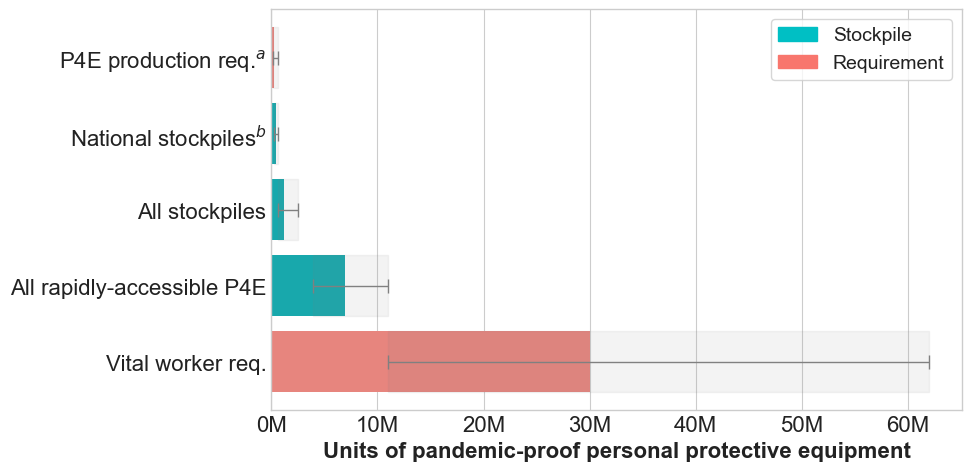

In [17]:
# create the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# create a list of colors
colors = ['#00BFC4' if name not in ['P4E production req. (excluding law)', 'Vital worker req.'] else '#F8766D' for name in df['Name']]

# rename long labels
df['Name'] = df['Name'].replace({
    'P4E production req. (excluding law)': 'P4E production req.$^a$',
    'National stockpiles (excluding military)': 'National stockpiles$^b$',
    'All distributed P4E': 'All rapidly-accessible P4E'
})

# create the bar plot
sns.barplot(
    x="Median",
    y="Name",
    data=df,
    palette=colors,
    ax=ax,
)

# add low and high as error bars
ax.errorbar(
    x=df["Median"],
    y=df["Name"],
    xerr=[df["Median"] - df["Low"], df["High"] - df["Median"]],
    fmt="o",
    color="grey",
    markersize=0,
    capsize=5,
    capthick=1,
    # change line thickness
    lw=1,
    zorder=3,
)

# add low and high as error boxes for each bar
for i, row in df.iterrows():
    ax.fill_betweenx(
        y=[i - 0.4, i + 0.4],  # adjust these values to change the height of the error boxes
        x1=row["Low"],
        x2=row["High"],
        color="grey",
        alpha=0.09,
        zorder=3,
    )

# remove the y label
ax.set_ylabel('')

# change the x label
ax.set_xlabel('Units of pandemic-proof personal protective equipment', fontweight='bold')

# change the x axis ticks to represent millions
ax.set_xticklabels(['{:.0f}M'.format(tick/1e6) for tick in ax.get_xticks()])

# create the legend patches
stockpile_patch = mpatches.Patch(color='#00BFC4', label='Stockpile')
requirement_patch = mpatches.Patch(color='#F8766D', label='Requirement')

# add the legend to the plot
legend = ax.legend(handles=[stockpile_patch, requirement_patch], loc='upper right', facecolor="white", frameon=True)

# save the plot with a resolution of 300 dpi
plt.tight_layout()
plt.savefig('../results/p4e_plot.png', dpi=300)